In [114]:
import os
import yaml
import pandas as pd
import scipy
from scipy.stats import chi2
from scipy.stats import norm
from scipy.stats import sem, t
from scipy.stats import linregress
from scipy.stats import normaltest
from scipy.stats import chi2
from scipy.stats import norm
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
sns.set()

import glob
from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d import axes3d
from mpl_toolkits.mplot3d.art3d import Poly3DCollection, Line3DCollection
%matplotlib notebook

In [115]:
files = glob.glob('.\\sipper\\*\\*.yaml', recursive=True)
files

['.\\sipper\\sipper_1\\unit0_2021-10-14T00_18_19.747276Z.yaml',
 '.\\sipper\\sipper_1\\unit0_2021-10-14T00_21_19.304284Z.yaml',
 '.\\sipper\\sipper_2\\unit0_2021-10-14T00_24_16.493929Z.yaml',
 '.\\sipper\\sipper_2\\unit0_2021-10-14T00_26_48.436519Z.yaml',
 '.\\sipper\\sipper_2\\unit0_2021-10-14T00_29_09.002327Z.yaml',
 '.\\sipper\\sipper_3\\unit0_2021-10-14T00_32_17.115516Z.yaml',
 '.\\sipper\\sipper_3\\unit0_2021-10-14T00_34_50.083046Z.yaml',
 '.\\sipper\\sipper_3\\unit0_2021-10-14T00_37_11.987762Z.yaml',
 '.\\sipper\\sipper_4\\unit0_2021-10-14T00_40_11.512403Z.yaml',
 '.\\sipper\\sipper_4\\unit0_2021-10-14T00_42_41.120521Z.yaml',
 '.\\sipper\\sipper_4\\unit0_2021-10-14T00_54_28.286719Z.yaml',
 '.\\sipper\\sipper_5\\unit0_2021-10-14T00_57_20.661118Z.yaml',
 '.\\sipper\\sipper_5\\unit0_2021-10-14T00_59_44.807750Z.yaml',
 '.\\sipper\\sipper_5\\unit0_2021-10-14T01_02_11.543055Z.yaml',
 '.\\sipper\\sipper_6\\unit0_2021-10-14T01_05_19.056251Z.yaml',
 '.\\sipper\\sipper_6\\unit0_2021-10-14T

In [116]:
if __name__ == "__main__":

    df = []
    cols = ["File", "X", "Y", "Z"]
    files = glob.glob('.\\sipper\\*\\*.yaml', recursive=True)

    for file in files:
        filename = file
        stream = open(filename, 'r')
        input_map = yaml.load(stream)

        try:
            x_dim = input_map["current_photo_interrupt_gpx"]
            y_dim = input_map["current_photo_interrupt_gpy"]
            z_dim = input_map["current_photo_interrupt_gpz"]

            stats_df = pd.DataFrame(columns=cols)
            stats_df.loc[0] = [file, x_dim, y_dim, z_dim]
            df.append(stats_df)
        except KeyError:
                print("couldn't find value in file %s" % file)
                    
    df_output = pd.concat(df)
    filename = "sipper_results_yaml.csv"
    df_output.to_csv(filename, sep=',', index=False)
    print("saved to file")


<ipython-input-116-61d778b4a090>:10: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  input_map = yaml.load(stream)


saved to file


In [117]:
df_output["X_mm"] = df_output["X"]*1e-6 - df_output["X"].mean()*1e-6
df_output["Y_mm"] = df_output["Y"]*1e-6 - df_output["Y"].mean()*1e-6
df_output["Z_mm"] = df_output["Z"]*1e-6 - df_output["Z"].mean()*1e-6

<IPython.core.display.Javascript object>


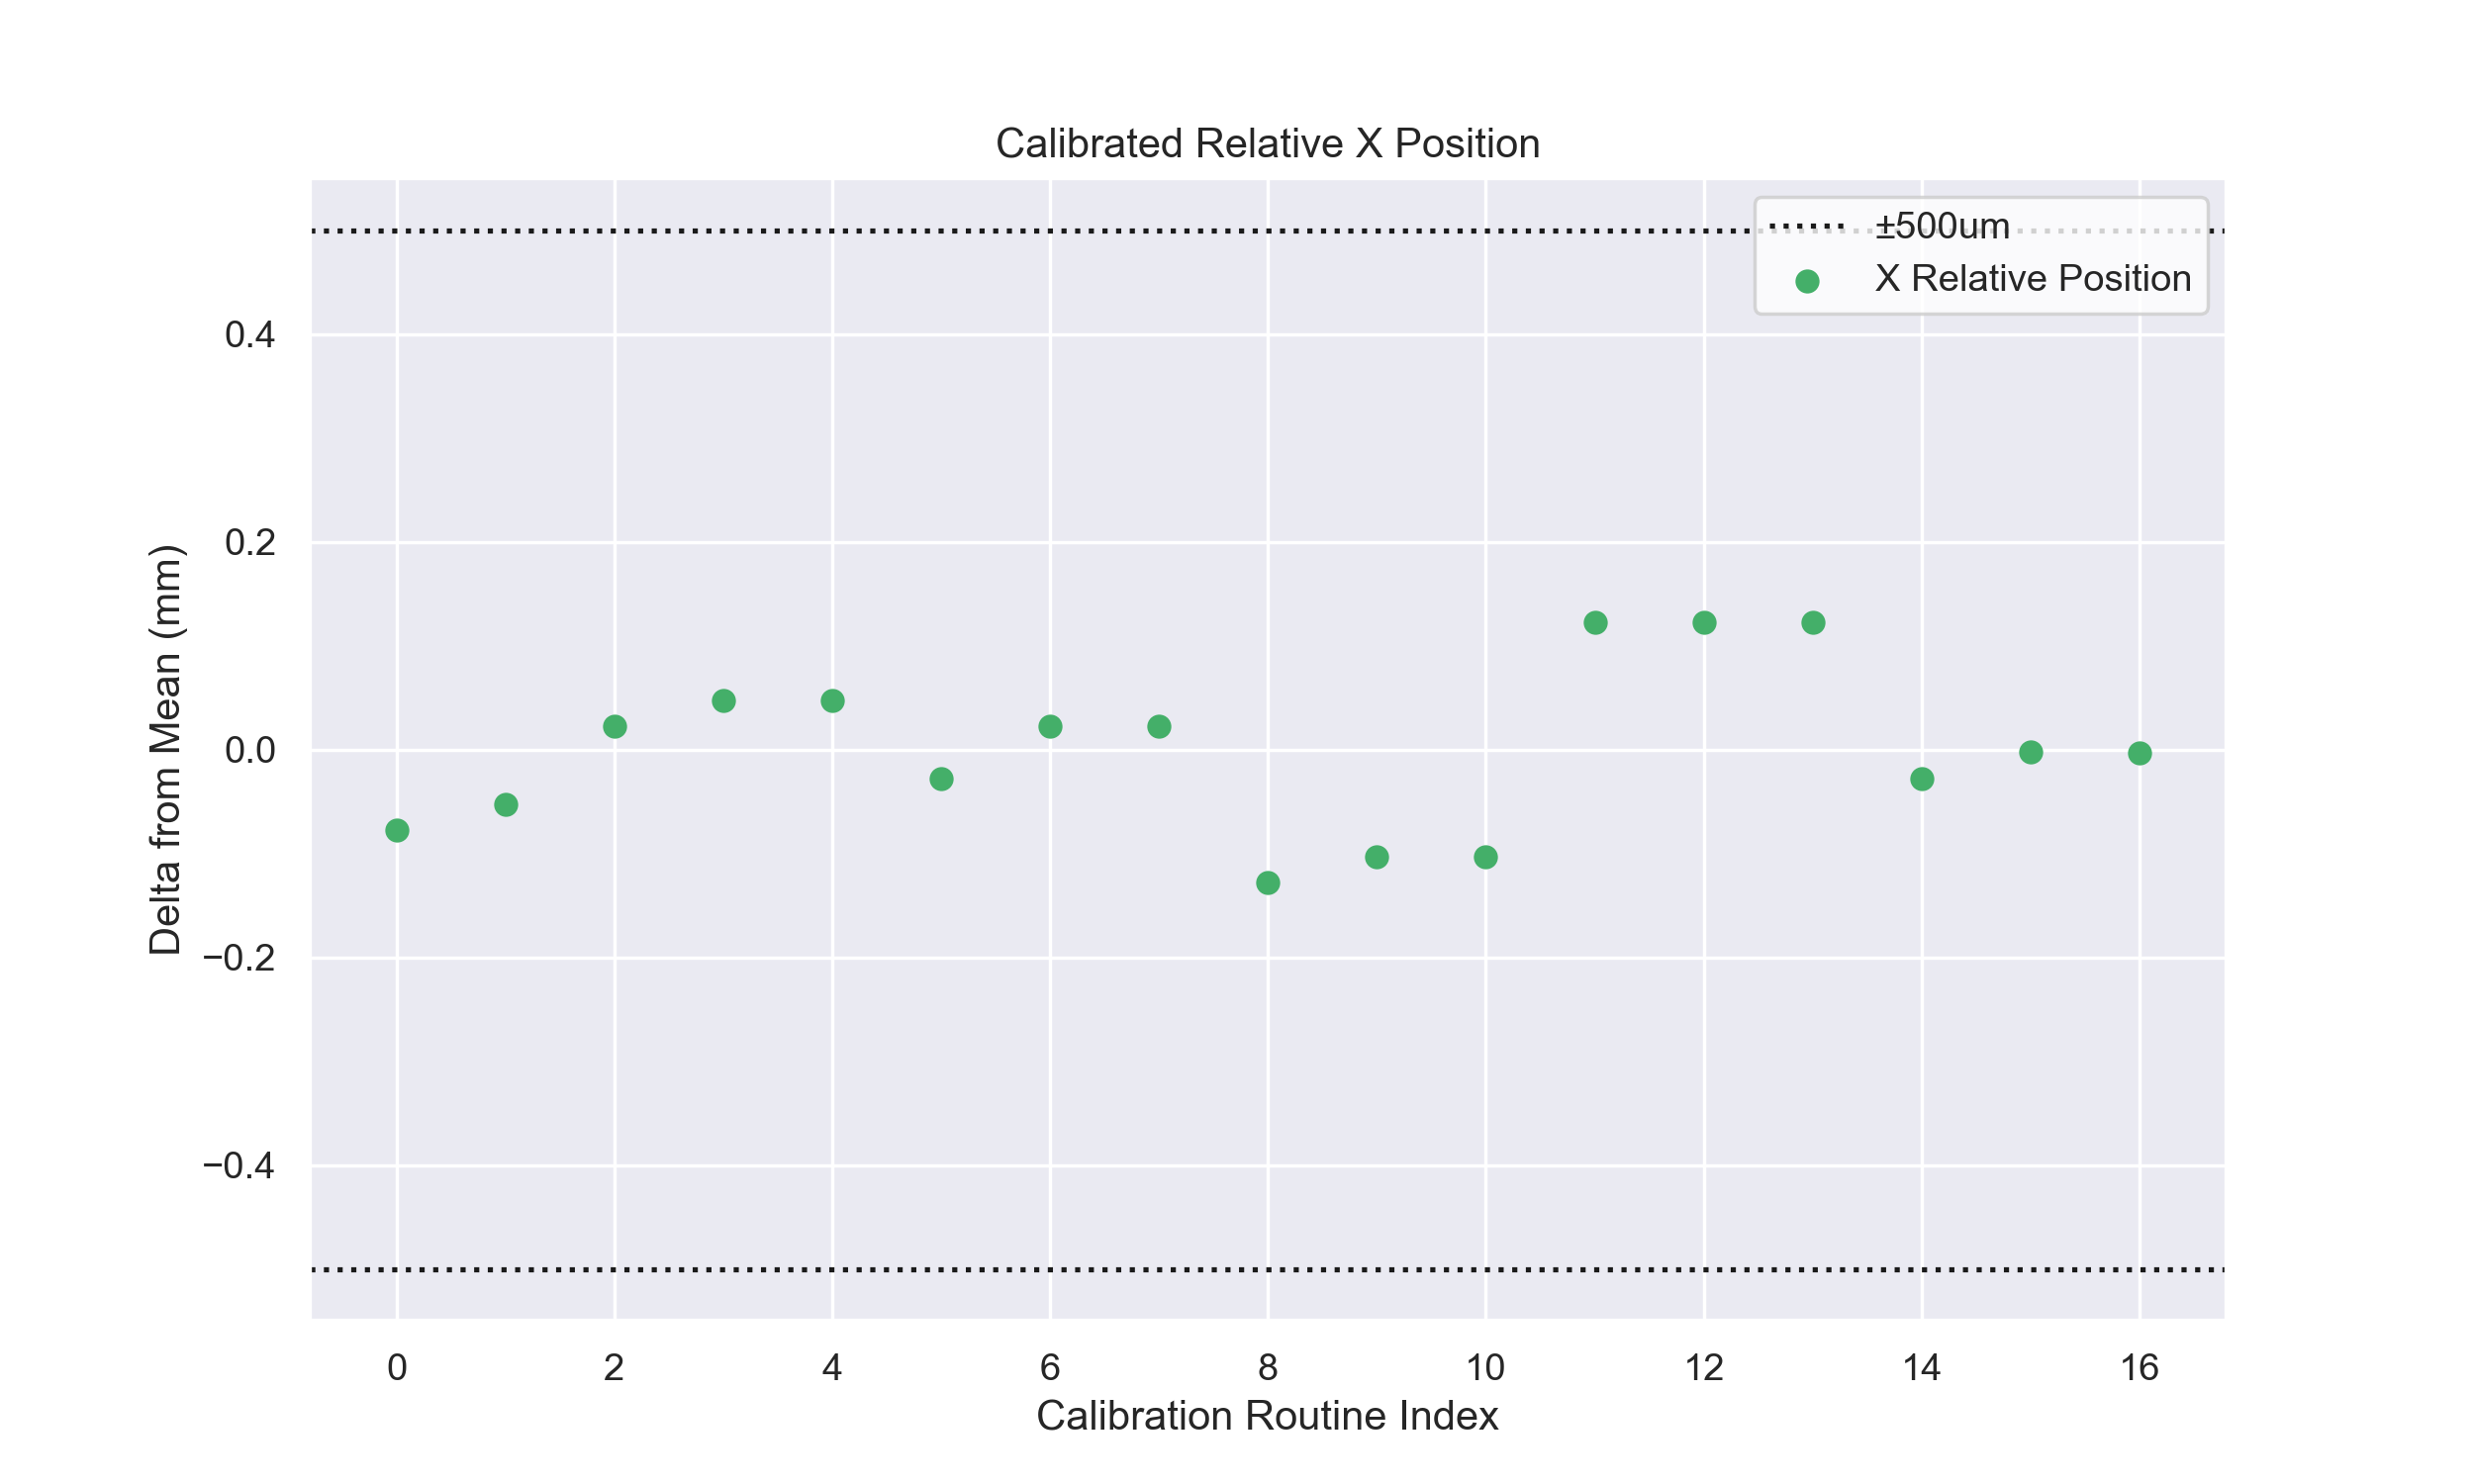

In [118]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(range(df_output.shape[0]), df_output['X_mm'], color="#44AF69", label="X Relative Position")
ax.axhline(-.5, label="±500um", linestyle=":", color='k')
ax.axhline(.5, linestyle=":", color='k')
ax.set(xlabel="Calibration Routine Index", ylabel="Delta from Mean (mm)",
      title="Calibrated Relative X Position")
ax.legend(facecolor='white')
plt.show()

<IPython.core.display.Javascript object>


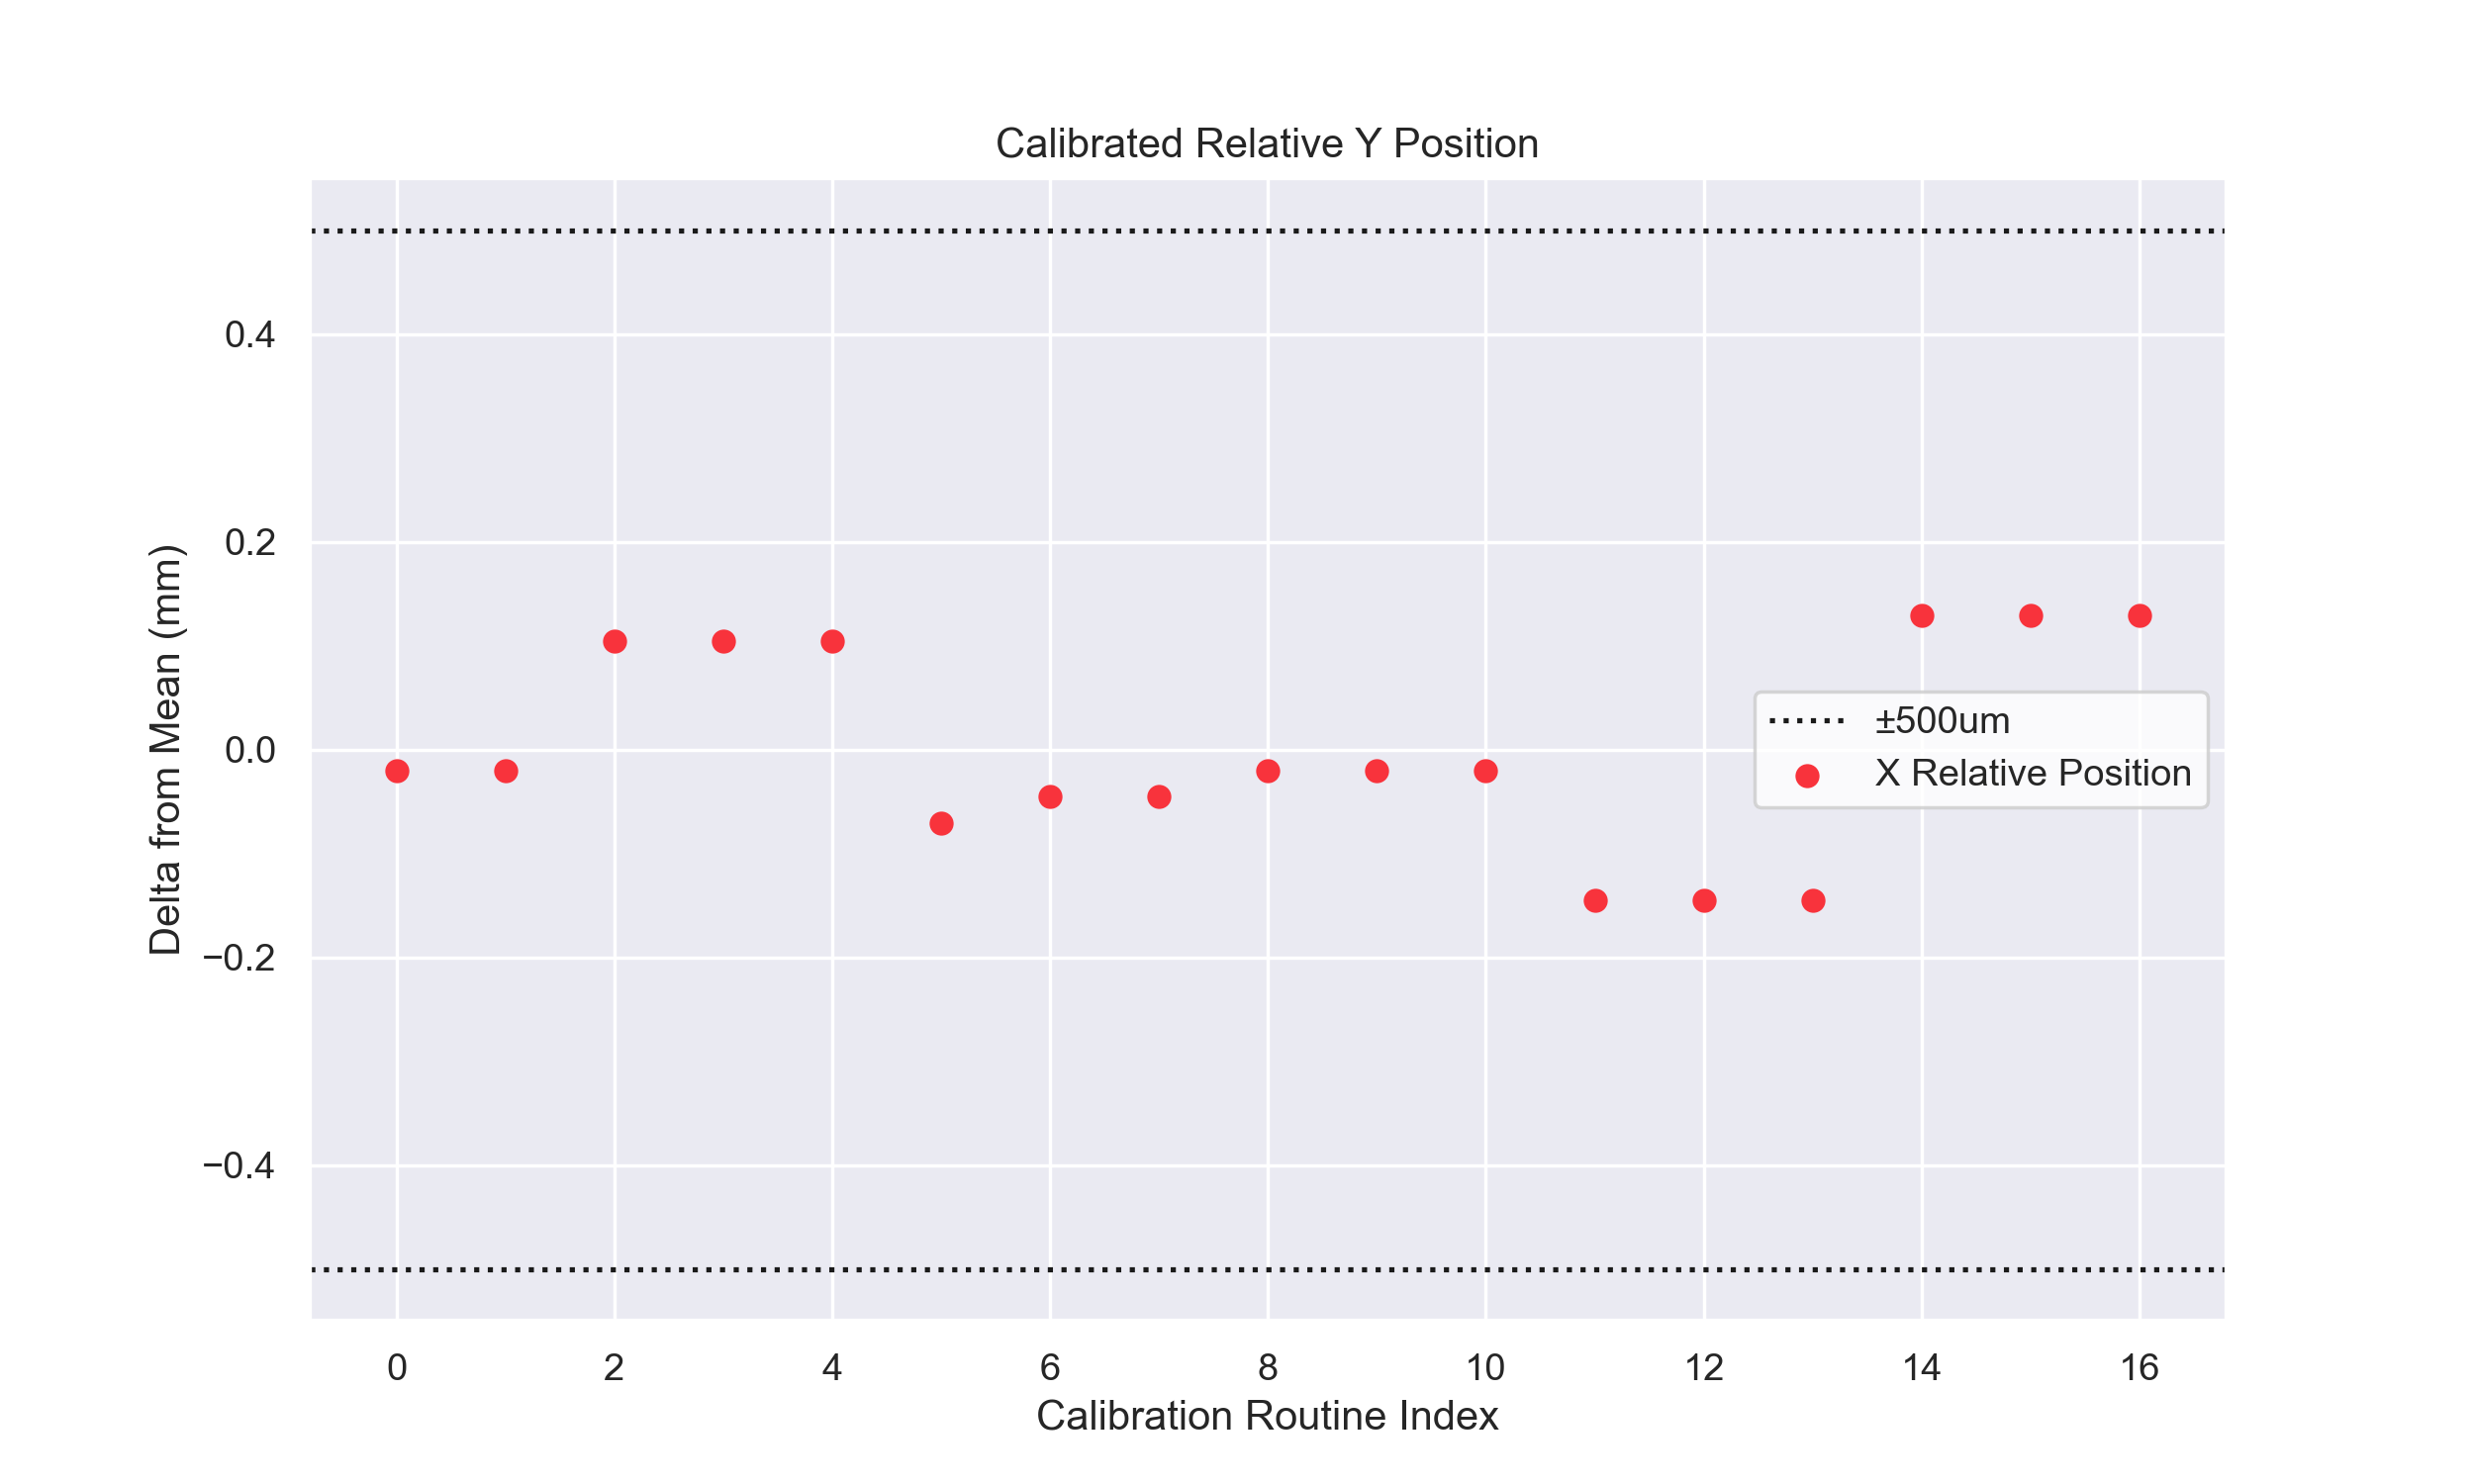

In [119]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(range(df_output.shape[0]), df_output['Y_mm'], color="#F8333C", label="X Relative Position")
ax.set(xlabel="Calibration Routine Index", ylabel="Delta from Mean (mm)",
      title="Calibrated Relative Y Position")
ax.axhline(-.5, label="±500um", linestyle=":", color='k')
ax.axhline(.5, linestyle=":", color='k')
ax.legend(facecolor='white')
plt.show()

<IPython.core.display.Javascript object>


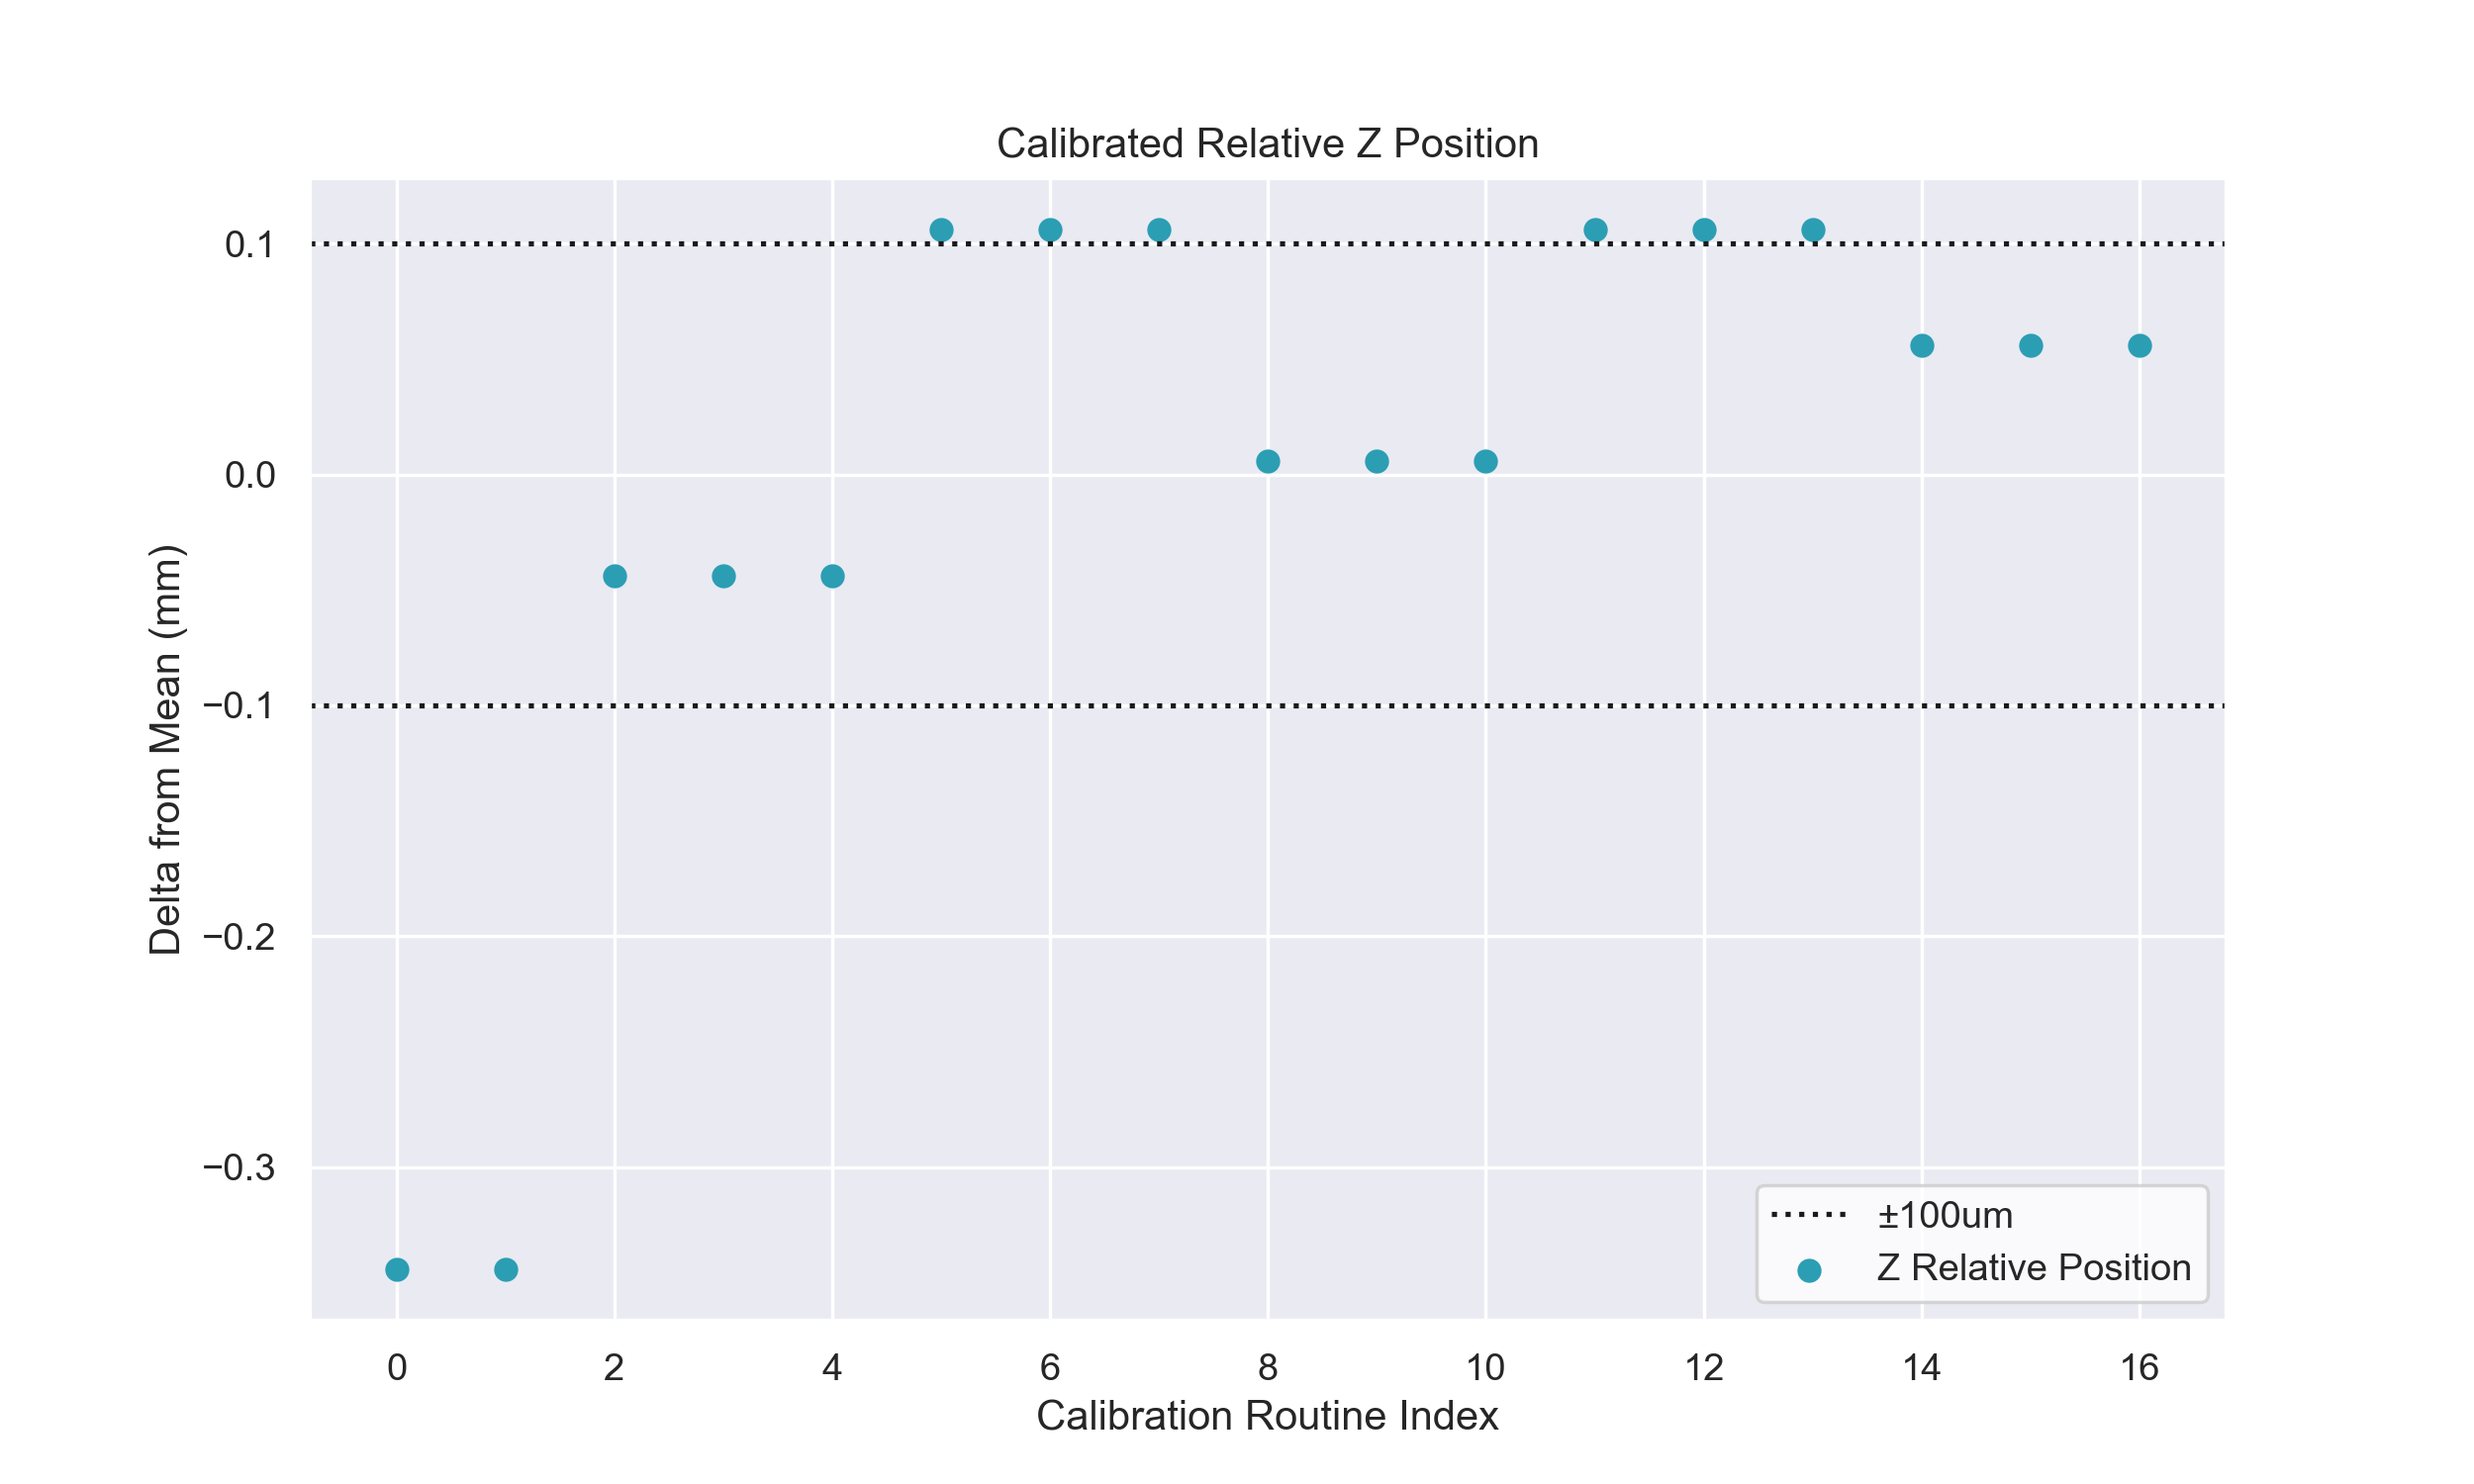

In [120]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(range(df_output.shape[0]), df_output['Z_mm'], color="#2B9EB3", label="Z Relative Position")
ax.axhline(-.1, label="±100um", linestyle=":", color='k')
ax.axhline(.1, linestyle=":", color='k')
ax.set(xlabel="Calibration Routine Index", ylabel="Delta from Mean (mm)",
      title="Calibrated Relative Z Position")
ax.legend(facecolor='white')
plt.show()

In [121]:
x_tol = 0.5
y_tol = 0.5
z_tol = 0.1

x = [-x_tol,  x_tol,  x_tol, -x_tol, 
     -x_tol,  x_tol,  x_tol, -x_tol]

y = [-y_tol, -y_tol,  y_tol,  y_tol, 
     -y_tol, -y_tol,  y_tol,  y_tol]

z = [ z_tol,  z_tol,  z_tol,  z_tol,
     -z_tol, -z_tol, -z_tol, -z_tol]

Z=[]
for i in range(len(x)):
    Z.append([x[i], y[i], z[i]])
Z

verts = [[Z[0],Z[1],Z[2],Z[3]],
 [Z[4],Z[5],Z[6],Z[7]], 
 [Z[0],Z[1],Z[5],Z[4]], 
 [Z[2],Z[3],Z[7],Z[6]], 
 [Z[1],Z[2],Z[6],Z[5]],
 [Z[4],Z[7],Z[3],Z[0]]]

<IPython.core.display.Javascript object>


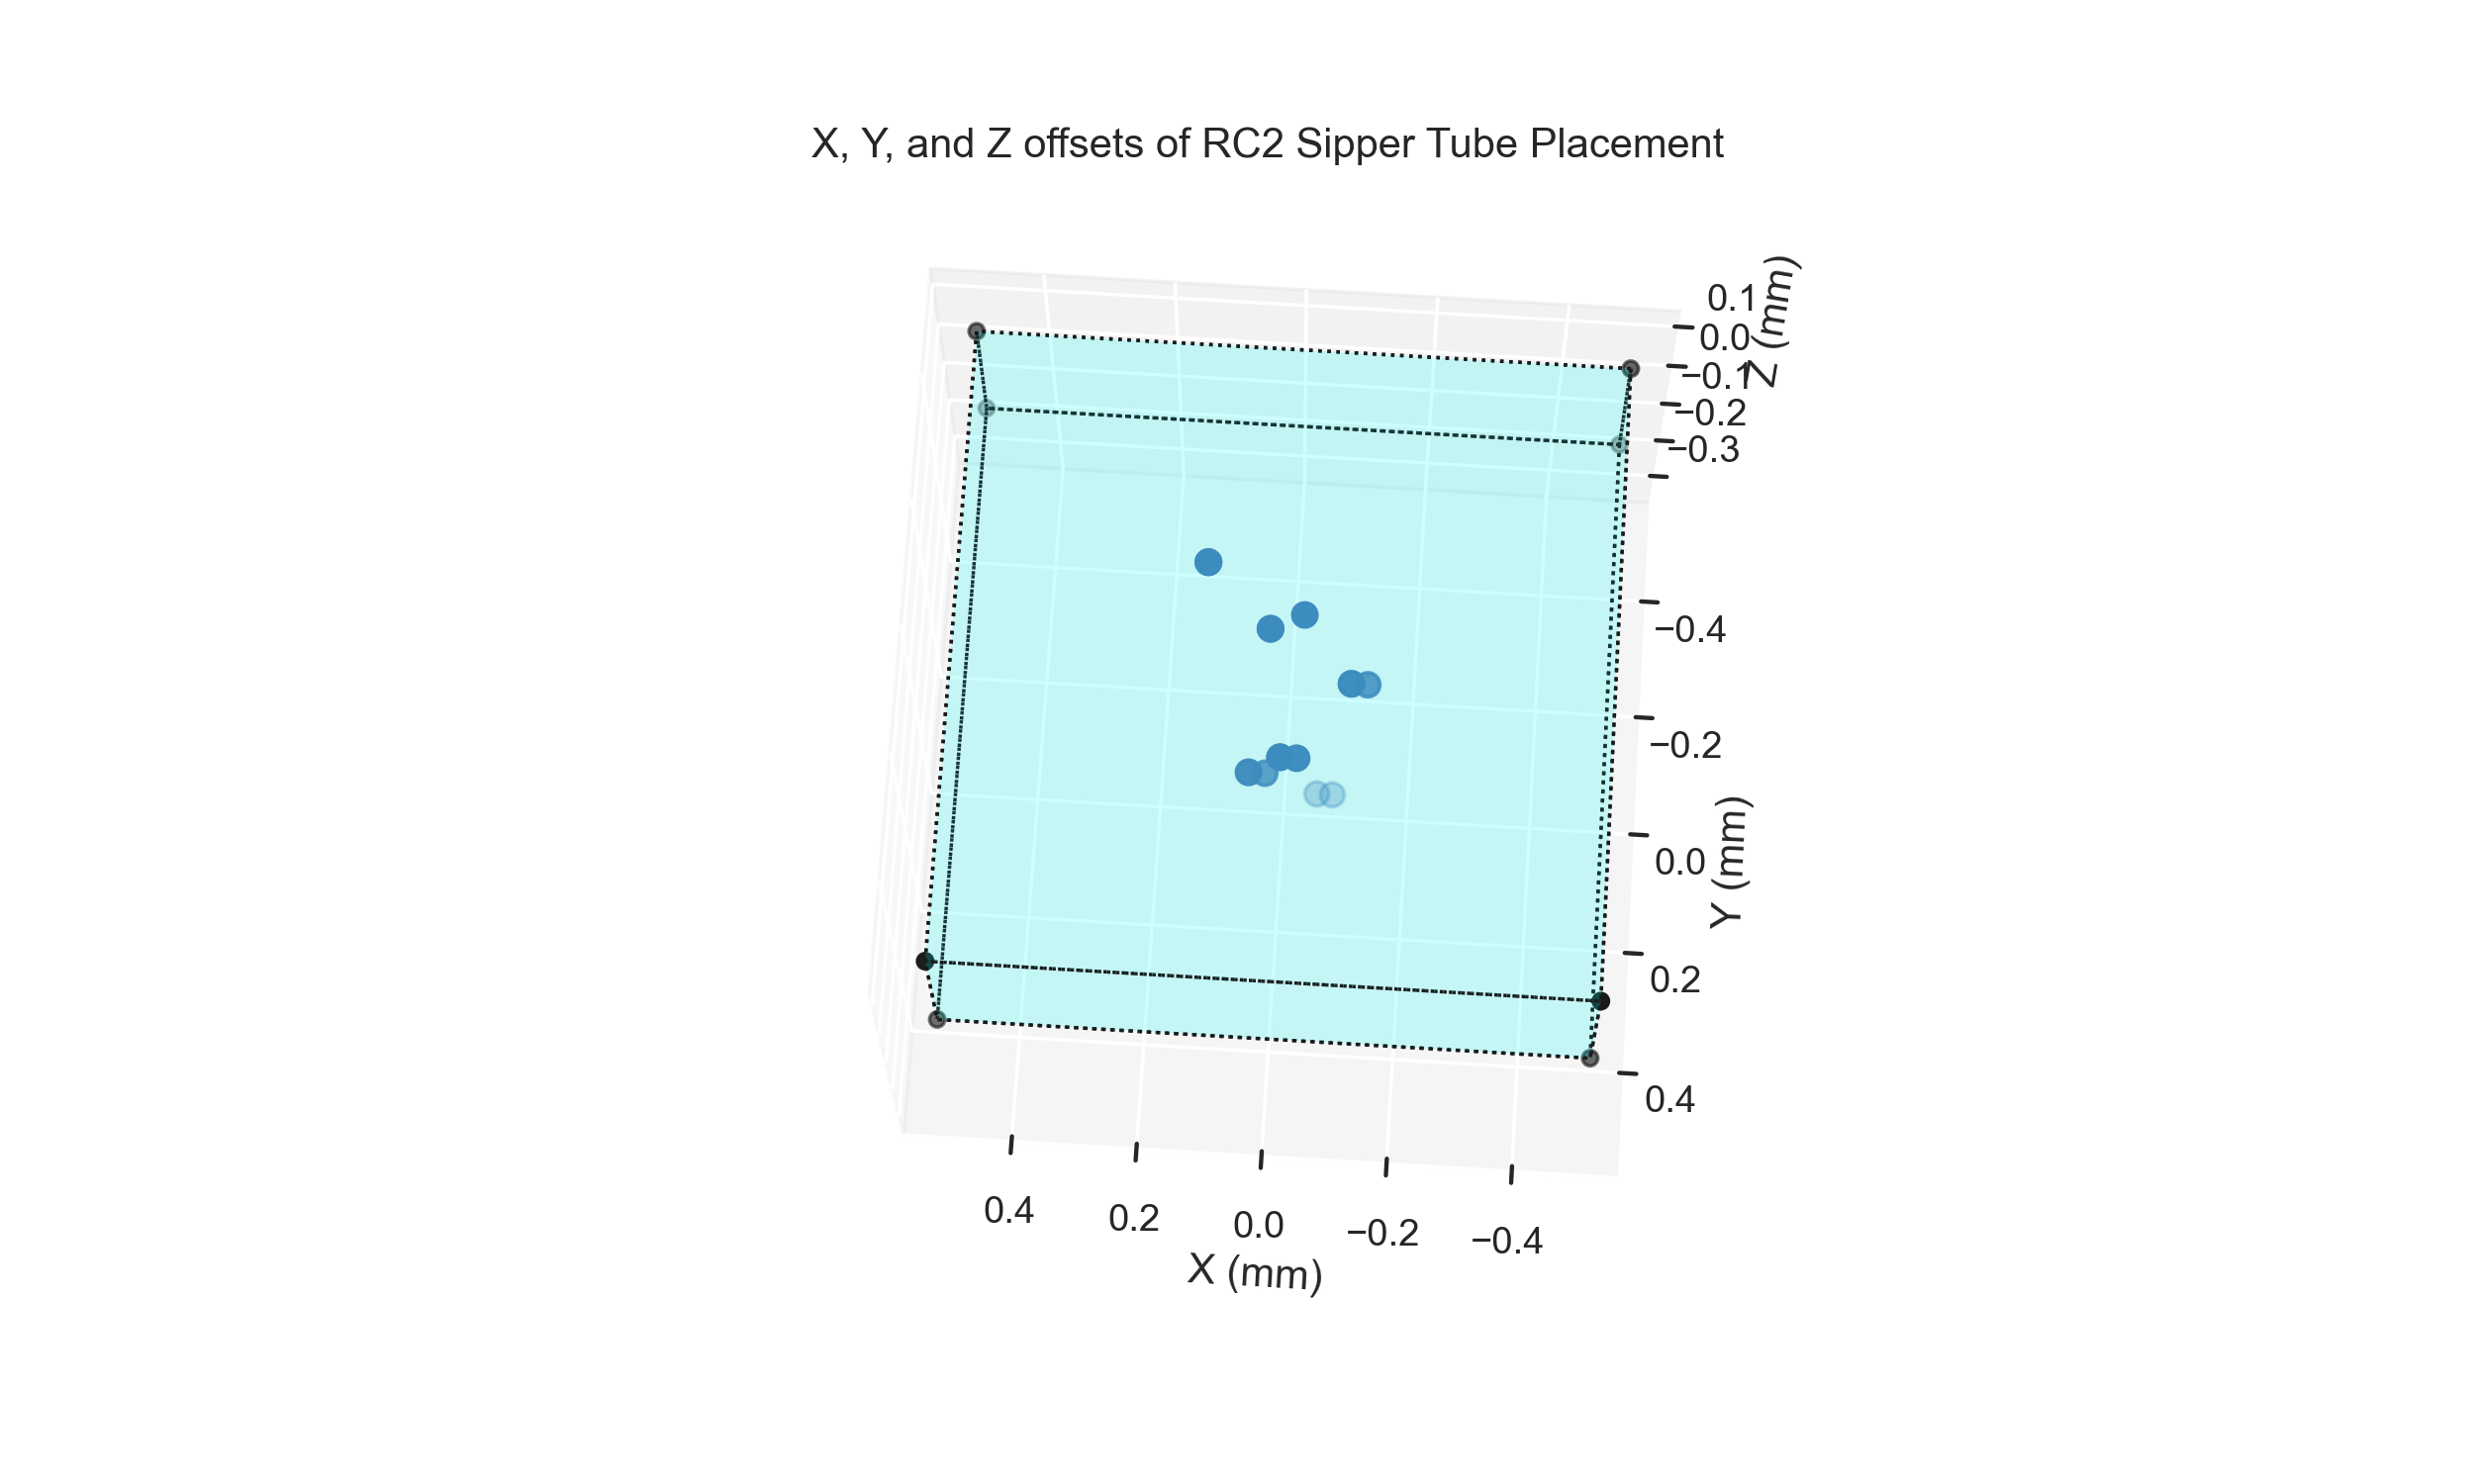

In [122]:
fig = plt.figure(figsize=(10,6))
ax = plt.axes(projection='3d')
scatter = ax.scatter3D(df_output['X_mm'], df_output['Y_mm'], df_output['Z_mm'], s=50)
ax.scatter3D(x, y, z, color='k')
ax.add_collection3d(Poly3DCollection(verts, 
 facecolors='cyan', linewidths=1, edgecolors='k', linestyle=':', alpha=.10))
ax.set(title='X, Y, and Z offsets of RC2 Sipper Tube Placement')

ax.set_xlabel('X (mm)')
ax.set_ylabel('Y (mm)')
ax.set_zlabel('Z (mm)')

ax.set_facecolor('white')

<IPython.core.display.Javascript object>


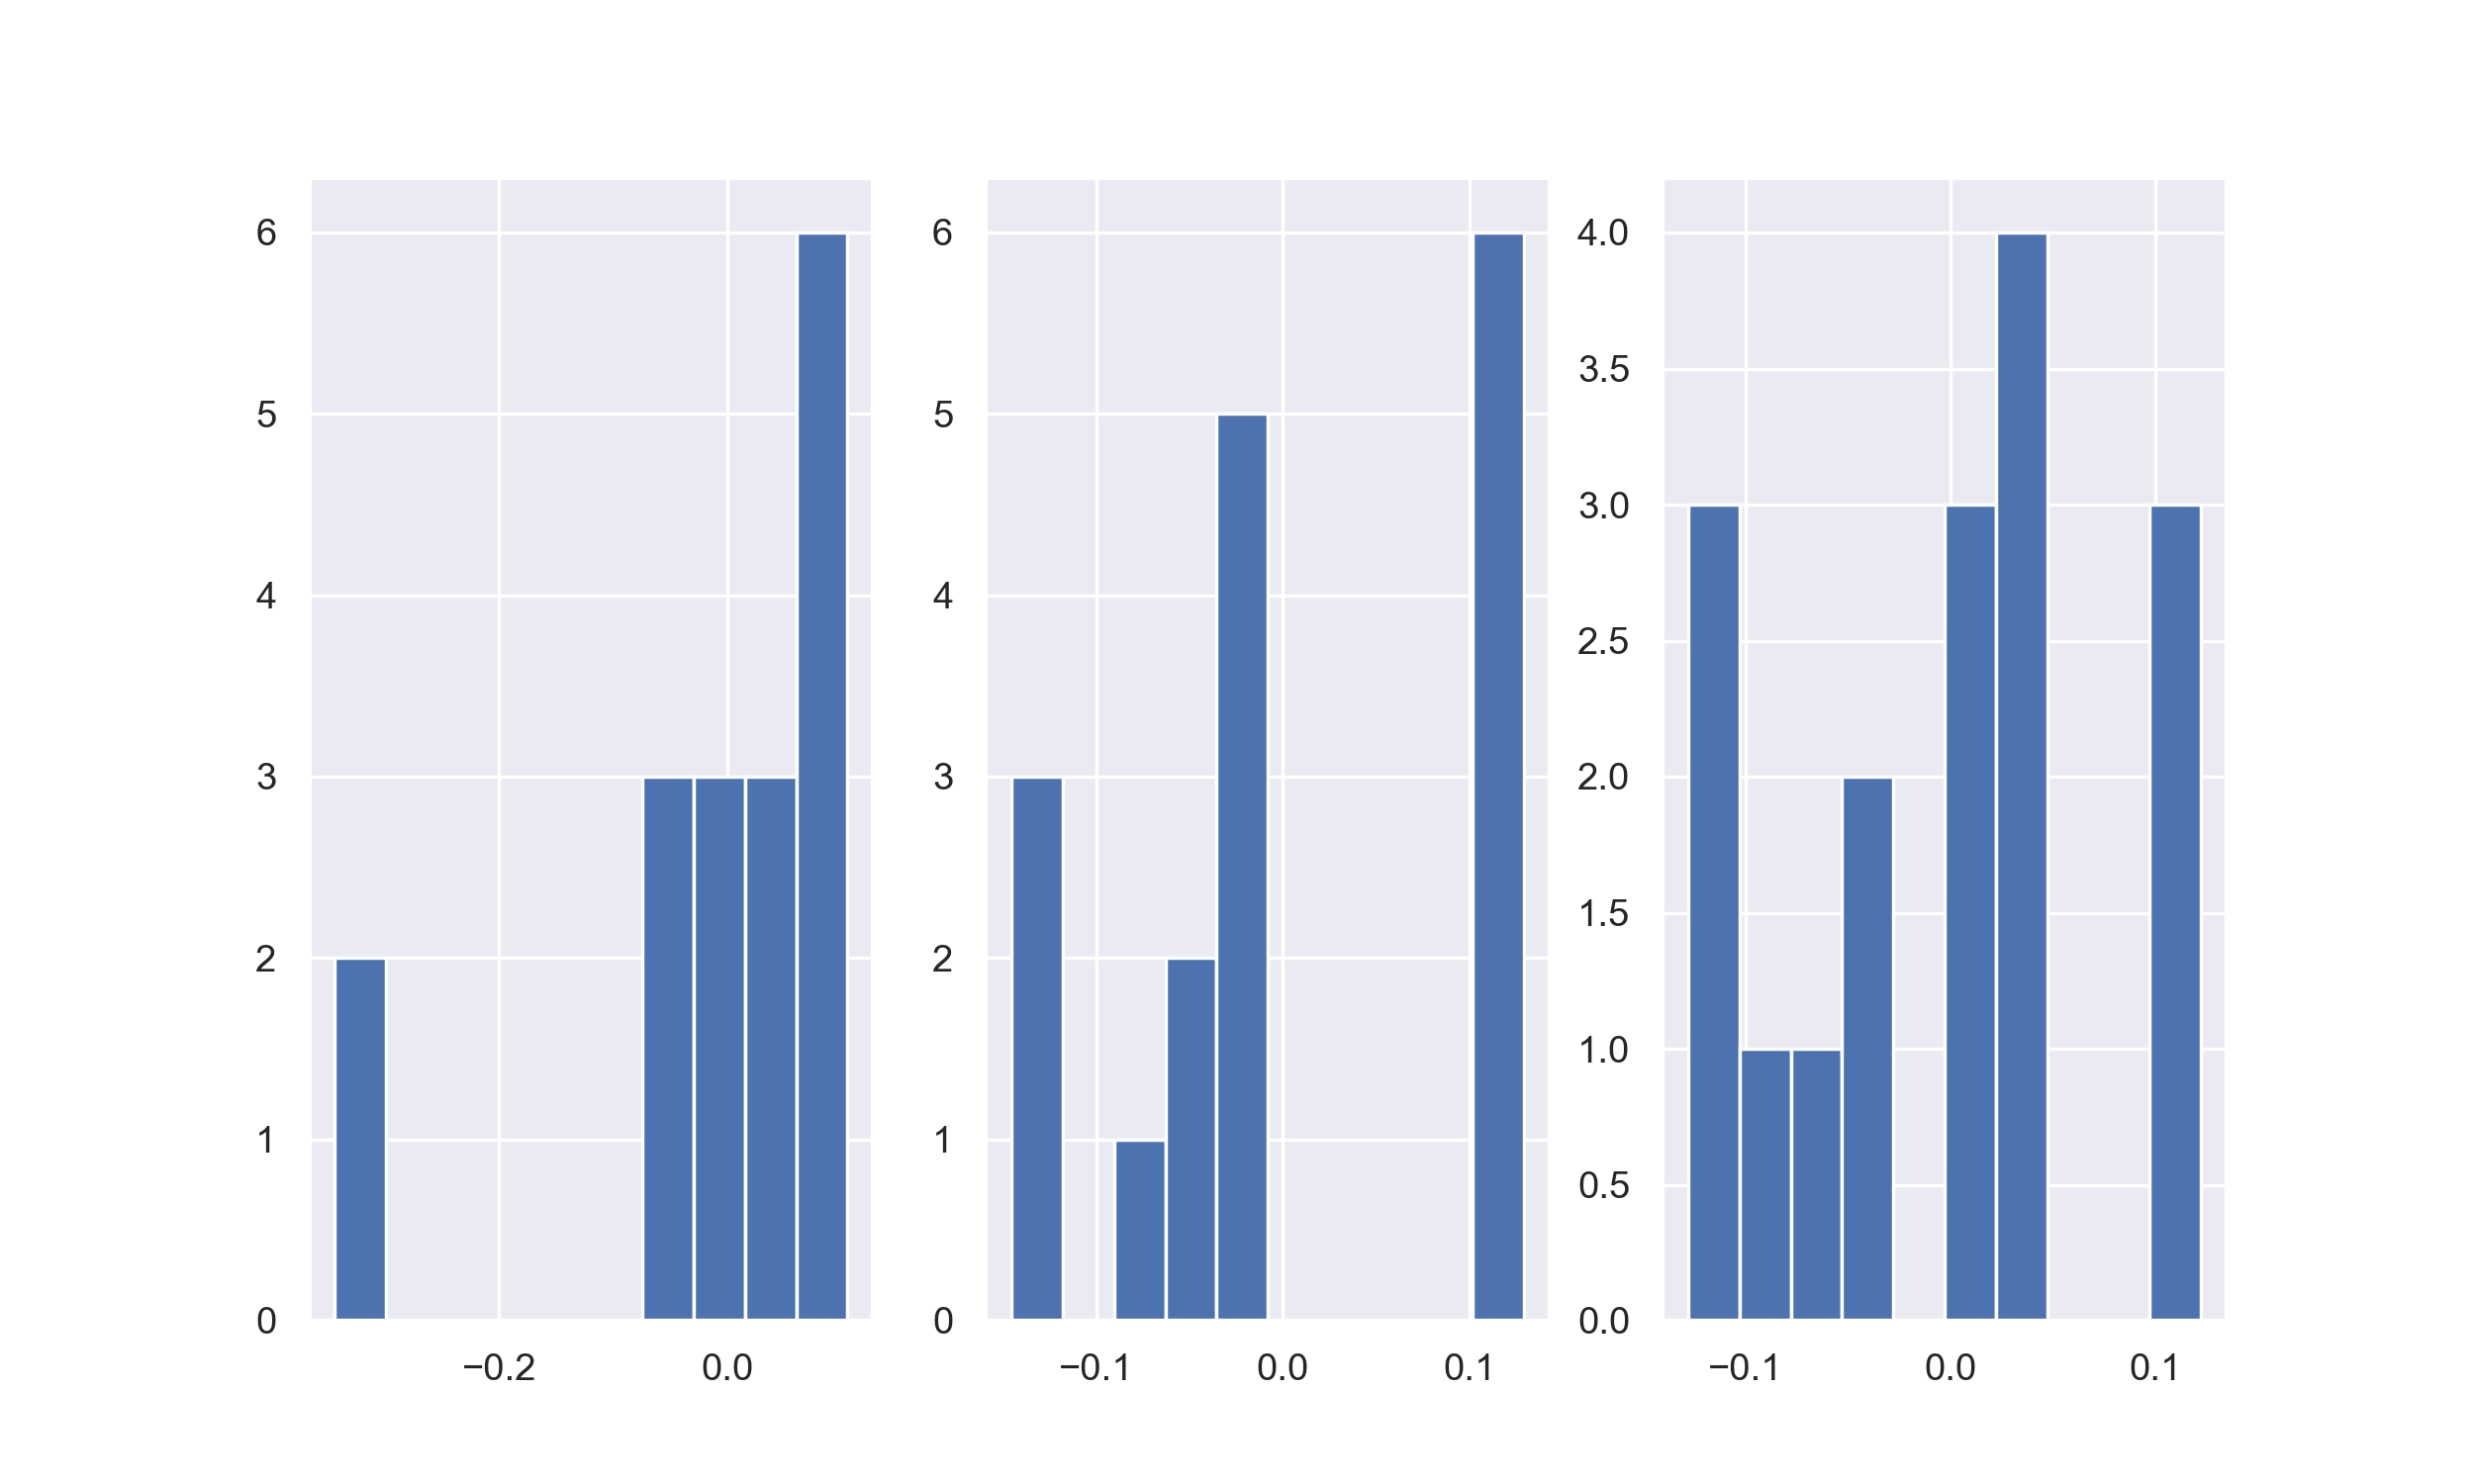

(array([3., 1., 1., 2., 0., 3., 4., 0., 0., 3.]),
 array([-0.1278859999999895, -0.10289199999998858, -0.07789799999998763,
        -0.052903999999986684, -0.027909999999985752,
        -0.0029159999999848196, 0.02207800000001614, 0.04707200000001707,
        0.072066000000018, 0.09706000000001894, 0.12205400000001987],
       dtype=object),
 <BarContainer object of 10 artists>)

In [123]:
fig, axes = plt.subplots(1, 3, figsize=(10, 6))
axes[0].hist(df_output["Z_mm"], label="Z")
axes[1].hist(df_output["Y_mm"], label="Y")
axes[2].hist(df_output["X_mm"], label="X")